### Solar cycle 23 ARs and associated M/X-class flares

- Spot size $\rightarrow$ SMART AR total area 

In [4]:
# Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import sunpy.map
import astropy.units as u
import matplotlib.gridspec as gridspec
import datetime as dt

In [2]:
# Defining the path for the dataframe
custom_df = 'C:/Users/Peter/py_projects/solar_stats/custom_df.p'

# Importing the dataframe
df = pd.read_pickle(custom_df)

In [5]:
# AIA sample map
sample_map = 'C:/Users/Peter/py_projects/solar_stats/aia_sample.fits' 
smap = sunpy.map.Map(sample_map)

# SMART props for Solar Cycle
sc = df[['smart_observation_time', 
         'smart_total_flux',
         'smart_hcx_position',
         'smart_hcy_position', 
         'smart_total_area',
         'goes_flux']]
sc = sc.dropna(how='any')
sc = sc.reset_index(drop=True)

# Formatting
sc.goes_flux = np.log10(sc.goes_flux)
sc['smart_total_flux'] = sc['smart_total_flux'].astype(float)

# Limiting to cycle 23 (May 1996 - Jan 2008)
start1 = dt.datetime(1996, 5, 1)
start2 = dt.datetime(2008, 1, 31, 0, 0, 0)
c23 = sc[ (sc.smart_observation_time >= start1) & (sc.smart_observation_time < start2) ]

# Converting floats
sc_dates = sc['smart_observation_time'].values.astype(float)
c23_dates = c23['smart_observation_time'].values.astype(float)

# Converting coords
lons_c23 = (c23['smart_hcx_position'].values*u.arcsec).to(u.deg)
lats_c23 = (c23['smart_hcy_position'].values*u.arcsec).to(u.deg)

# Marker sizes
size_c23 = 75*c23.smart_total_area/c23.smart_total_area.mean()
size_flux = 75*c23.smart_total_flux/c23.smart_total_flux.mean()

#==================================================================================================================

# Splitting up the different GOES classes
a = c23[ (c23['goes_flux'] >= -8.0) & (c23['goes_flux'] <= -7.0) ]  
b = c23[ (c23['goes_flux'] > -7.0)  & (c23['goes_flux'] <= -6.0) ]  
c = c23[ (c23['goes_flux'] > -6.0)  & (c23['goes_flux'] <= -5.0) ]  
m = c23[ (c23['goes_flux'] > -5.0)  & (c23['goes_flux'] <= -4.0) ]  
x = c23[ (c23['goes_flux'] > -4.0)  & (c23['goes_flux'] <= -3.0) ]  

# Converting coords
lons_fc = (c['smart_hcx_position'].values*u.arcsec).to(u.deg)
lats_fc = (c['smart_hcy_position'].values*u.arcsec).to(u.deg)
lons_fm = (m['smart_hcx_position'].values*u.arcsec).to(u.deg)
lats_fm = (m['smart_hcy_position'].values*u.arcsec).to(u.deg)
lons_fx = (x['smart_hcx_position'].values*u.arcsec).to(u.deg)
lats_fx = (x['smart_hcy_position'].values*u.arcsec).to(u.deg)

size_fc = 75*c.smart_total_area/c.smart_total_area.mean()
size_fm = 75*m.smart_total_area/m.smart_total_area.mean()
size_fx = 75*x.smart_total_area/x.smart_total_area.mean()

dates_fc = c.smart_observation_time
dates_fm = m.smart_observation_time
dates_fx = x.smart_observation_time

# Total Flux sizes
c_flux = 75*c.smart_total_flux/c.smart_total_flux.mean()
m_flux = 75*m.smart_total_flux/m.smart_total_flux.mean()
x_flux = 75*x.smart_total_flux/x.smart_total_flux.mean()

C:\Users\Peter\anaconda3\lib\site-packages\astropy\visualization\mpl_normalize.py:130: RuntimeWarning: invalid value encountered in true_divide
  np.true_divide(values, self.vmax - self.vmin, out=values)
C:\Users\Peter\anaconda3\lib\site-packages\astropy\visualization\mpl_normalize.py:130: RuntimeWarning: invalid value encountered in true_divide
  np.true_divide(values, self.vmax - self.vmin, out=values)
C:\Users\Peter\anaconda3\lib\site-packages\astropy\visualization\mpl_normalize.py:130: RuntimeWarning: invalid value encountered in true_divide
  np.true_divide(values, self.vmax - self.vmin, out=values)
C:\Users\Peter\anaconda3\lib\site-packages\astropy\visualization\mpl_normalize.py:130: RuntimeWarning: invalid value encountered in true_divide
  np.true_divide(values, self.vmax - self.vmin, out=values)


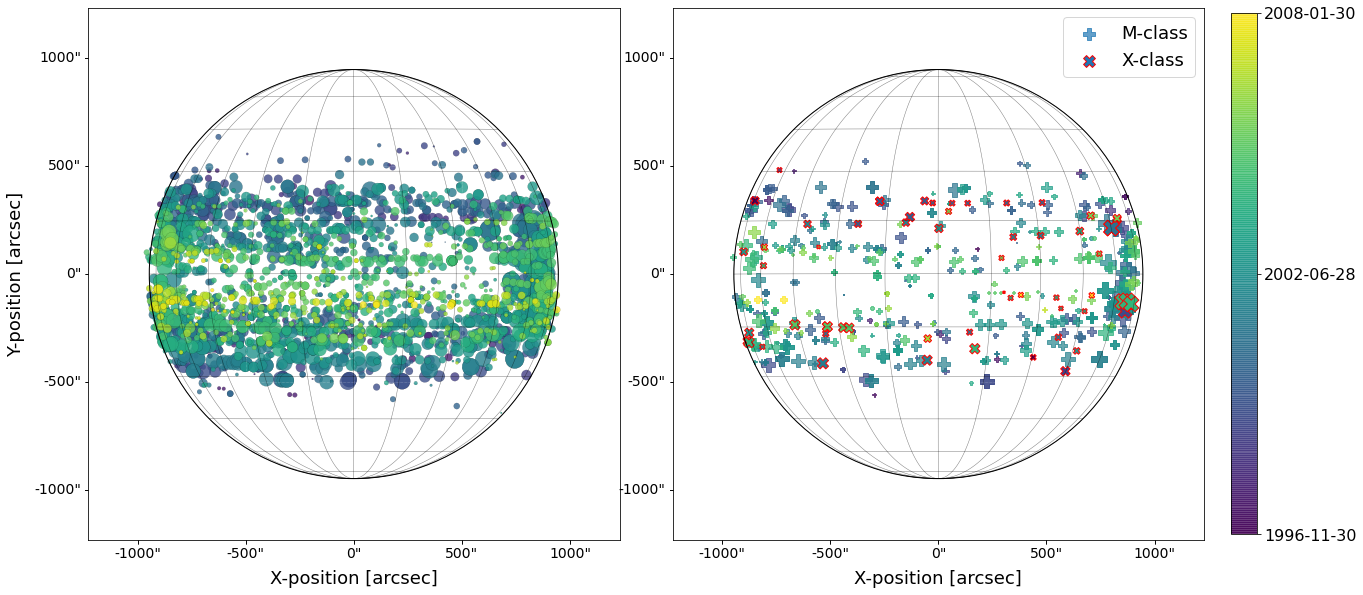

In [7]:
# Plotting
fig = plt.figure(constrained_layout=False, figsize=(20,10), facecolor='white')
spec = gridspec.GridSpec(ncols=2, nrows=1, figure=fig)
spec.update(wspace=0.1)

ax1 = fig.add_subplot(spec[0,0], projection=smap)
#ax1 = fig.add_subplot(1, 2, 1, projection=smap)
#ax1.plot(projection=smap)
smap.plot(axes=ax1, cmap='Blues')
smap.data[:,:]=[500.]
smap.draw_limb(color='k')
smap.draw_grid(color='k', lw = 0.5)
ax1.set_autoscale_on(False)
ax1.set_title(' ')
ax1.set_xlabel('X-position [arcsec]', fontsize=18)
ax1.set_ylabel('Y-position [arcsec]', fontsize=18)
ax1.tick_params(axis='both', labelsize=14)


# Scatter plot
sct1 = ax1.scatter(lons_c23, lats_c23, s=size_c23, edgecolor='k', lw=0.1,
                c=c23_dates, alpha=0.8, transform=ax1.get_transform('world'))

#==================================================================================================================

ax2 = fig.add_subplot(spec[0,1], projection=smap)
#ax2 = fig.add_subplot(1, 2, 2, projection=smap)
#ax2.plot(projection=smap)
smap.plot(axes=ax2, cmap='Blues')
smap.data[:,:]=[500.]
smap.draw_limb(color='k')
smap.draw_grid(color='k', lw = 0.5)
ax2.set_autoscale_on(False)
ax2.set_ylabel(' ')
ax2.axes.yaxis.set_ticklabels([])
ax2.set_title('')
ax2.set_xlabel('X-position [arcsec]', fontsize=18)
ax2.tick_params(axis='both', labelsize=14)

# Scatter plot
#c_loc = ax1.scatter(lons_fc, lats_fc, s=size_fc, lw=0.1, c=dates_fc, alpha=0.7, 
#                 marker='v', label='C', transform=ax1.get_transform('world'))

m_loc = ax2.scatter(lons_fm, lats_fm, s=size_fm, c=dates_fm, alpha=0.7, 
                 marker='P', label='M-class', transform=ax2.get_transform('world'))

x_loc = ax2.scatter(lons_fx, lats_fx, s=size_fx, edgecolor='red', lw=1, c=dates_fx, alpha=1, 
                 marker='X', label='X-class', transform=ax2.get_transform('world'))

leg = ax2.legend(loc='best', fontsize=18)

#==================================================================================================================

ax3 = inset_axes(ax2,
                   width="100%", 
                   height="90%",  
                   loc='lower left',
                   bbox_to_anchor=(1.05, 0.01, 0.05, 1.09),
                   bbox_transform=ax2.transAxes,
                   borderpad=0,
                   )

cb_c23 = fig.colorbar(sct1, cax=ax3, orientation='vertical',
                      ticks=[min(c23_dates), sc_dates[1162], max(c23_dates)])

cb_c23.ax.set_yticklabels(['1996-11-30', '2002-06-28', '2008-01-30'], fontsize=16)

#==================================================================================================================

#plt.tight_layout()
#plt.savefig('flux_c23_v3.png', dpi=300, bbox_inches='tight', pad_inches=0.1)
plt.show()